In [1]:
%matplotlib inline
from preamble import *

In [2]:
%%time
import mglearn

Wall time: 0 ns


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Working with Text Data

### Types of data represented as strings
#### Example application: Sentiment analysis of movie reviews

In [ ]:
!tree -dL 2 data/aclImdb

In [ ]:
!rm -r data/aclImdb/train/unsup

### This process takes Wall time: approximately 3 min 26s.  Go get some coffee

In [4]:
%%time
from sklearn.datasets import load_files

reviews_train = load_files("data/aclImdb/train/")
# load_files returns a bunch, containing training texts and training labels
text_train, y_train = reviews_train.data, reviews_train.target
print("type of text_train: {}".format(type(text_train)))
print("length of text_train: {}".format(len(text_train)))
print("text_train[6]:\n{}".format(text_train[6]))

type of text_train: <type 'list'>
length of text_train: 25000
text_train[6]:
This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending.
Wall time: 3min 58s


In [5]:
%%time 
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

Wall time: 76 ms


In [6]:
np.unique(y_train)

array([0, 1])

In [7]:
print("Samples per class (training): {}".format(np.bincount(y_train)))

Samples per class (training): [12500 12500]


### This process takes Wall time: 3 min 47 s. Go get some coffee

In [8]:
%%time
reviews_test = load_files("data/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
print("Number of documents in test data: {}".format(len(text_test)))
print("Samples per class (test): {}".format(np.bincount(y_test)))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

Number of documents in test data: 25000
Samples per class (test): [12500 12500]
Wall time: 3min 47s


### Representing text data as Bag of Words

![bag_of_words](images/bag_of_words.png)

#### Applying bag-of-words to a toy dataset

In [9]:
bards_words =["The fool doth think he is wise,",
              "but the wise man knows himself to be a fool"]

In [10]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)

Wall time: 2 ms


In [11]:
print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print("Vocabulary content:\n {}".format(vect.vocabulary_))

Vocabulary size: 13
Vocabulary content:
 {u'fool': 3, u'be': 0, u'he': 4, u'himself': 5, u'wise': 12, u'knows': 7, u'is': 6, u'but': 1, u'to': 11, u'the': 9, u'doth': 2, u'think': 10, u'man': 8}


In [12]:
bag_of_words = vect.transform(bards_words)
print("bag_of_words: {}".format(repr(bag_of_words)))

bag_of_words: <2x13 sparse matrix of type '<type 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [13]:
print("Dense representation of bag_of_words:\n{}".format(
    bag_of_words.toarray()))

Dense representation of bag_of_words:
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


### Bag-of-word for movie reviews

### This process takes approx: Wall time: 41.4 s

In [14]:
%%time
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<25000x74849 sparse matrix of type '<type 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>
Wall time: 10.9 s


In [15]:
feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

Number of features: 74849
First 20 features:
[u'00', u'000', u'0000000000001', u'00001', u'00015', u'000s', u'001', u'003830', u'006', u'007', u'0079', u'0080', u'0083', u'0093638', u'00am', u'00pm', u'00s', u'01', u'01pm', u'02']
Features 20010 to 20030:
[u'dratted', u'draub', u'draught', u'draughts', u'draughtswoman', u'draw', u'drawback', u'drawbacks', u'drawer', u'drawers', u'drawing', u'drawings', u'drawl', u'drawled', u'drawling', u'drawn', u'draws', u'draza', u'dre', u'drea']
Every 2000th feature:
[u'00', u'aesir', u'aquarian', u'barking', u'blustering', u'b\xeate', u'chicanery', u'condensing', u'cunning', u'detox', u'draper', u'enshrined', u'favorit', u'freezer', u'goldman', u'hasan', u'huitieme', u'intelligible', u'kantrowitz', u'lawful', u'maars', u'megalunged', u'mostey', u'norrland', u'padilla', u'pincher', u'promisingly', u'receptionist', u'rivals', u'schnaas', u'shunning', u'sparse', u'subset', u'temptations', u'treatises', u'unproven', u'walkman', u'xylophonist']


### This process takes approx: Wall time: 37min 40s  ==> Hurry up and just wait!!!

In [16]:
%%time
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.88
Wall time: 51.9 s


## This process takes approx: Wall time:  approximately 1h 23min 31s==> Hurry up and just wait!!!

In [17]:
%%time
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.89
('Best parameters: ', {'C': 0.1})
Wall time: 2min 54s


### This process takes approx: Last it took Wall time: 48.1 s ==> Hurry up and just wait!!!

In [18]:
%%time
X_test = vect.transform(text_test)
print("Test score: {:.2f}".format(grid.score(X_test, y_test)))

Test score: 0.88
Wall time: 5.42 s


### This process takes approx: Last time it took Wall time: 2min 15s ==> Hurry up and just wait!!!

In [19]:
%%time
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train with min_df: {}".format(repr(X_train)))

X_train with min_df: <25000x27271 sparse matrix of type '<type 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>
Wall time: 10.7 s


In [20]:
feature_names = vect.get_feature_names()

print("First 50 features:\n{}".format(feature_names[:50]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 700th feature:\n{}".format(feature_names[::700]))

First 50 features:
[u'00', u'000', u'007', u'00s', u'01', u'02', u'03', u'04', u'05', u'06', u'07', u'08', u'09', u'10', u'100', u'1000', u'100th', u'101', u'102', u'103', u'104', u'105', u'107', u'108', u'10s', u'10th', u'11', u'110', u'112', u'116', u'117', u'11th', u'12', u'120', u'12th', u'13', u'135', u'13th', u'14', u'140', u'14th', u'15', u'150', u'15th', u'16', u'160', u'1600', u'16mm', u'16s', u'16th']
Features 20010 to 20030:
[u'repentance', u'repercussions', u'repertoire', u'repetition', u'repetitions', u'repetitious', u'repetitive', u'rephrase', u'replace', u'replaced', u'replacement', u'replaces', u'replacing', u'replay', u'replayable', u'replayed', u'replaying', u'replays', u'replete', u'replica']
Every 700th feature:
[u'00', u'affections', u'appropriately', u'barbra', u'blurbs', u'butchered', u'cheese', u'commitment', u'courts', u'deconstructed', u'disgraceful', u'dvds', u'eschews', u'fell', u'freezer', u'goriest', u'hauser', u'hungary', u'insinuate', u'juggle', u'leerin

### This process takes approx: Last time it took Wall time: 1 hr 15min 41s ==> Hurry up and just wait!!!

In [21]:
%%time
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.89
Wall time: 2min 47s


### Stop-words

In [22]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)))
print("Every 10th stopword:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

Number of stop words: 318
Every 10th stopword:
['all', 'not', 'one', 'should', 'latterly', 'cannot', 'name', 'each', 'ten', 'beyond', 'mine', 'between', 'full', 'found', 'anything', 'became', 'formerly', 'everyone', 'three', 'anyone', 'was', 'becoming', 'he', 'besides', 'and', 'an', 'fill', 'when', 'becomes', 'hereupon', 'whereby', 'rather']


### This process takes approx: Last time it took Wall time: 36.4 s ==> Hurry up and just wait!!!

In [23]:
%%time
# Specifying stop_words="english" uses the built-in list.
# We could also augment it and pass our own.
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print("X_train with stop words:\n{}".format(repr(X_train)))

X_train with stop words:
<25000x26966 sparse matrix of type '<type 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>
Wall time: 10.7 s


###### This process takes approx: Last time it took Wall time: 60s ==> Hurry up and just wait!!!

In [24]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.88
Wall time: 59.9 s


### Rescaling the Data with tf-idf
\begin{equation*}
\text{tfidf}(w, d) = \text{tf} \log\big(\frac{N + 1}{N_w + 1}\big) + 1
\end{equation*}

### This process takes approx: Last time it took Wall time: approximately 6  min 32 s ==> Hurry up and just wait!!!

In [25]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
                     LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.89
Wall time: 6min 2s


#### This process takes approx: Last time it took Wall time: 19.6 s ==> Hurry up and just wait!!!¶

In [26]:
%%time
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# transform the training dataset:
X_train = vectorizer.transform(text_train)
# find maximum value for each of the features over dataset:
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(vectorizer.get_feature_names())

print("Features with lowest tfidf:\n{}".format(
      feature_names[sorted_by_tfidf[:20]]))

print("Features with highest tfidf: \n{}".format(
      feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
[u'poignant' u'disagree' u'instantly' u'importantly' u'lacked' u'occurred'
 u'currently' u'altogether' u'nearby' u'undoubtedly' u'directs' u'fond'
 u'stinker' u'avoided' u'emphasis' u'commented' u'disappoint' u'realizing'
 u'downhill' u'inane']
Features with highest tfidf: 
[u'coop' u'homer' u'dillinger' u'hackenstein' u'gadget' u'taker'
 u'macarthur' u'vargas' u'jesse' u'basket' u'dominick' u'the' u'victor'
 u'bridget' u'victoria' u'khouri' u'zizek' u'rob' u'timon' u'titanic']
Wall time: 5.57 s


#### This process takes approx: Last time it took Wall time: 11 ms ==> Quick

In [27]:
%%time
sorted_by_idf = np.argsort(vectorizer.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:100]]))

Features with lowest idf:
[u'the' u'and' u'of' u'to' u'this' u'is' u'it' u'in' u'that' u'but' u'for'
 u'with' u'was' u'as' u'on' u'movie' u'not' u'have' u'one' u'be' u'film'
 u'are' u'you' u'all' u'at' u'an' u'by' u'so' u'from' u'like' u'who'
 u'they' u'there' u'if' u'his' u'out' u'just' u'about' u'he' u'or' u'has'
 u'what' u'some' u'good' u'can' u'more' u'when' u'time' u'up' u'very'
 u'even' u'only' u'no' u'would' u'my' u'see' u'really' u'story' u'which'
 u'well' u'had' u'me' u'than' u'much' u'their' u'get' u'were' u'other'
 u'been' u'do' u'most' u'don' u'her' u'also' u'into' u'first' u'made'
 u'how' u'great' u'because' u'will' u'people' u'make' u'way' u'could' u'we'
 u'bad' u'after' u'any' u'too' u'then' u'them' u'she' u'watch' u'think'
 u'acting' u'movies' u'seen' u'its' u'him']
Wall time: 3 ms


#### Investigating model coefficients

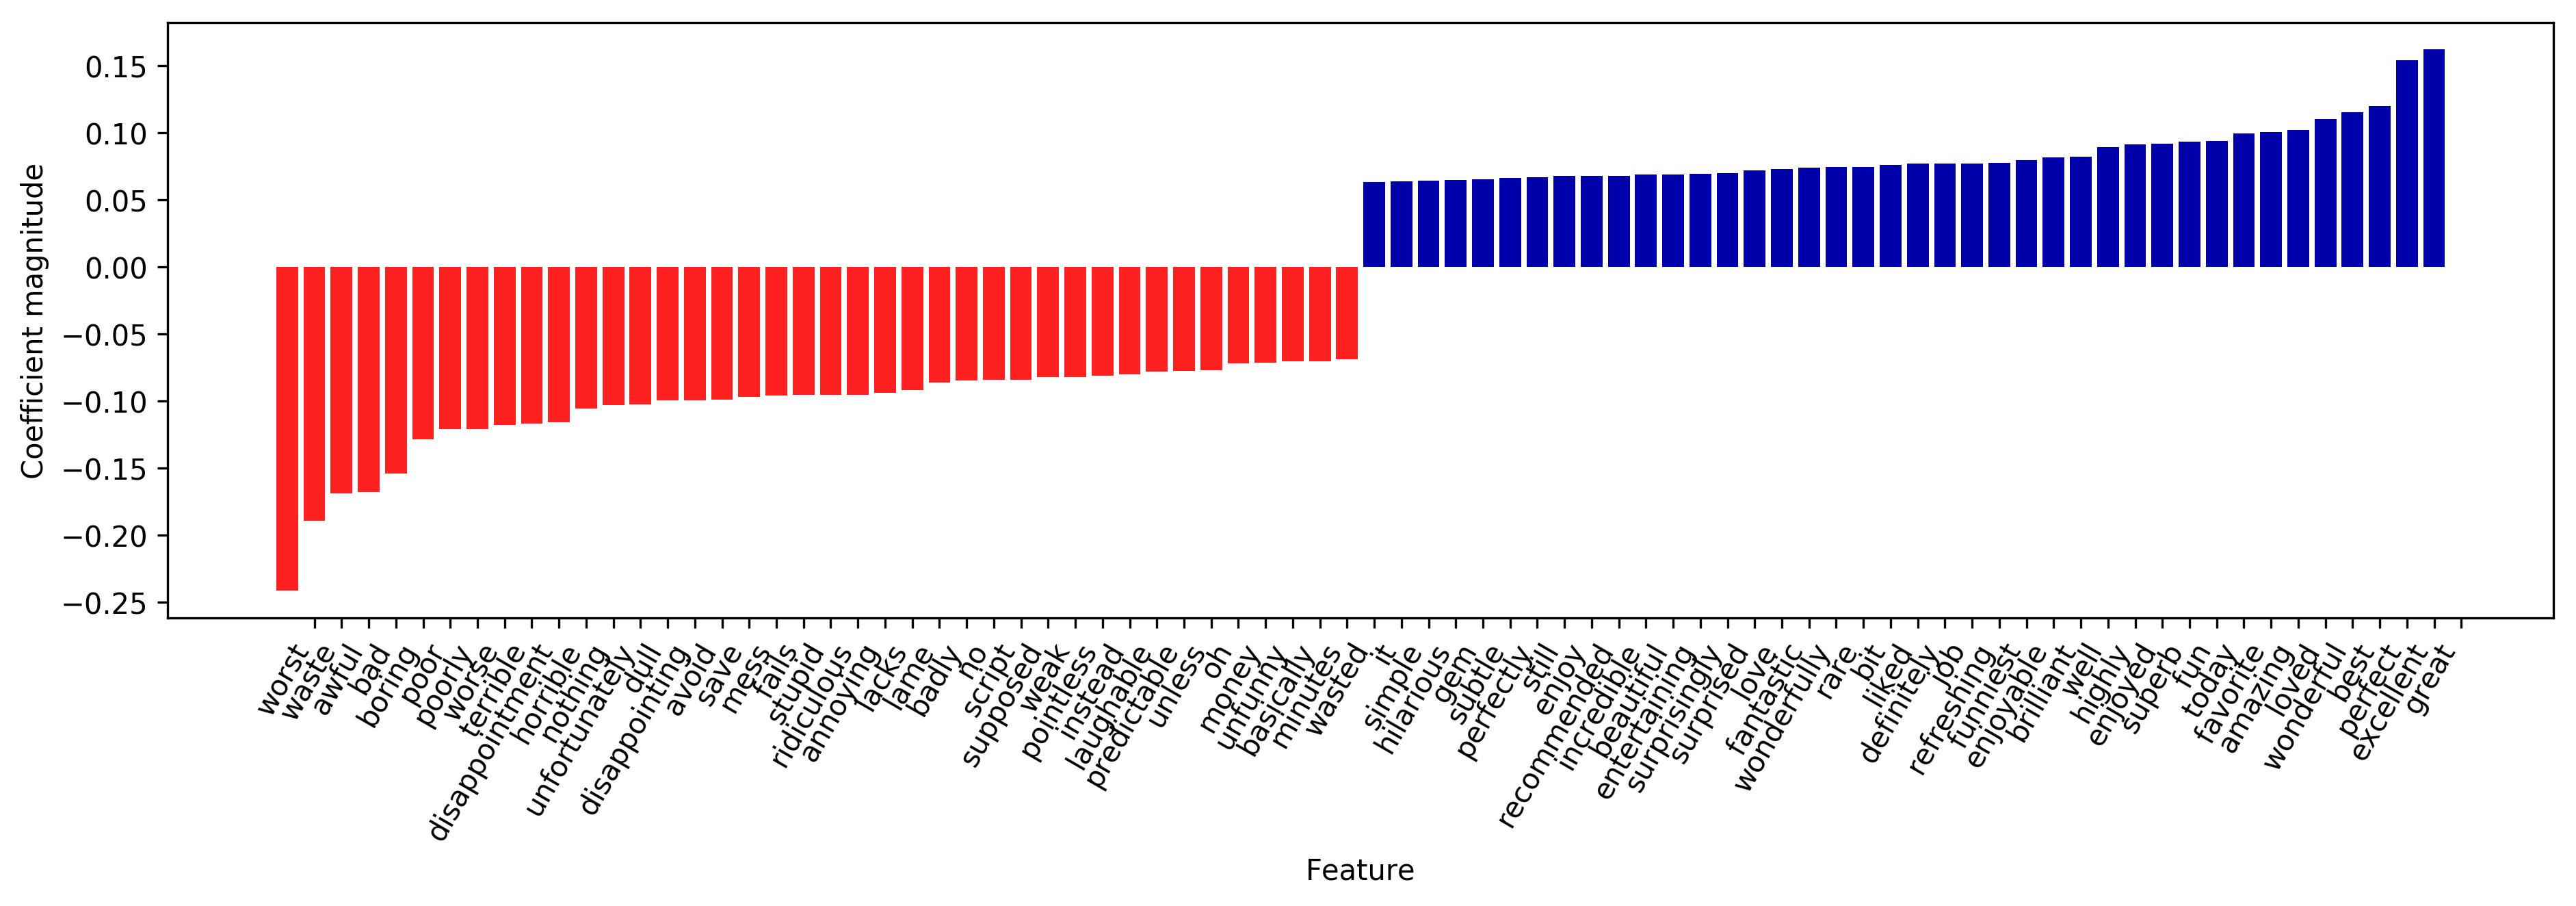

In [28]:
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_,
    feature_names, n_top_features=40)

#### Bag of words with more than one word (n-grams)

In [29]:
print("bards_words:\n{}".format(bards_words))

bards_words:
['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


#### This process takes approx: Last time it took Wall time: 7 ms  ==> Hurry up and just wait!!!¶

In [30]:
%%time
cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size: 13
Vocabulary:
[u'be', u'but', u'doth', u'fool', u'he', u'himself', u'is', u'knows', u'man', u'the', u'think', u'to', u'wise']
Wall time: 1e+03 µs


#### This process takes approx: Last time it took Wall time: XX s ==> Hurry up and just wait!!!¶

In [31]:
%%time
cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size: 14
Vocabulary:
[u'be fool', u'but the', u'doth think', u'fool doth', u'he is', u'himself to', u'is wise', u'knows himself', u'man knows', u'the fool', u'the wise', u'think he', u'to be', u'wise man']
Wall time: 1e+03 µs


In [32]:
print("Transformed data (dense):\n{}".format(cv.transform(bards_words).toarray()))

Transformed data (dense):
[[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


#### This process takes approx: Last time it took Wall time: 8 ms ==>  Quick!!¶

In [33]:
%%time
cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size: 39
Vocabulary:
[u'be', u'be fool', u'but', u'but the', u'but the wise', u'doth', u'doth think', u'doth think he', u'fool', u'fool doth', u'fool doth think', u'he', u'he is', u'he is wise', u'himself', u'himself to', u'himself to be', u'is', u'is wise', u'knows', u'knows himself', u'knows himself to', u'man', u'man knows', u'man knows himself', u'the', u'the fool', u'the fool doth', u'the wise', u'the wise man', u'think', u'think he', u'think he is', u'to', u'to be', u'to be fool', u'wise', u'wise man', u'wise man knows']
Wall time: 1e+03 µs


### This process takes approx: Last time it took Wall time: 1 hr 5 min 28 s ==> Hurry up and just wait!!!¶

In [34]:
%%time
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
# running the grid-search takes a long time because of the
# relatively large grid and the inclusion of trigrams
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
              "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

Best cross-validation score: 0.91
Best parameters:
{'tfidfvectorizer__ngram_range': (1, 3), 'logisticregression__C': 100}
Wall time: 1h 5min 28s


### This process takes approx: Last time it took Wall time: 352 ms ==> Quick !!!¶

Wall time: 352 ms


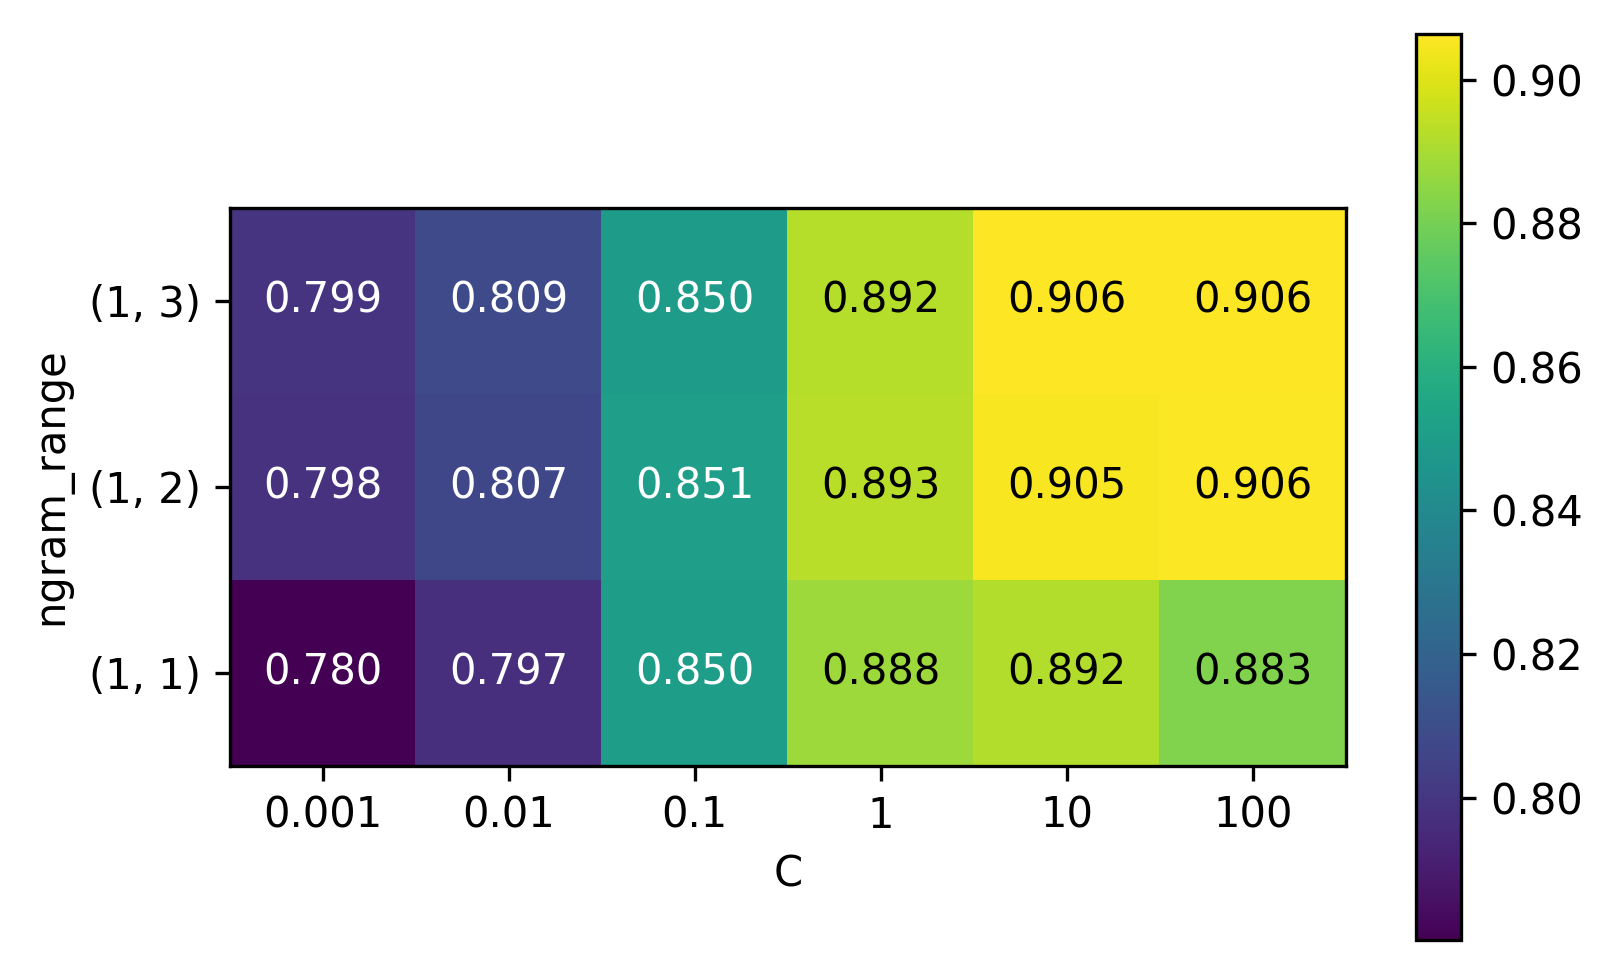

In [35]:
%%time
# extract scores from grid_search
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
# visualize heat map
heatmap = mglearn.tools.heatmap(
    scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

Wall time: 1.77 s


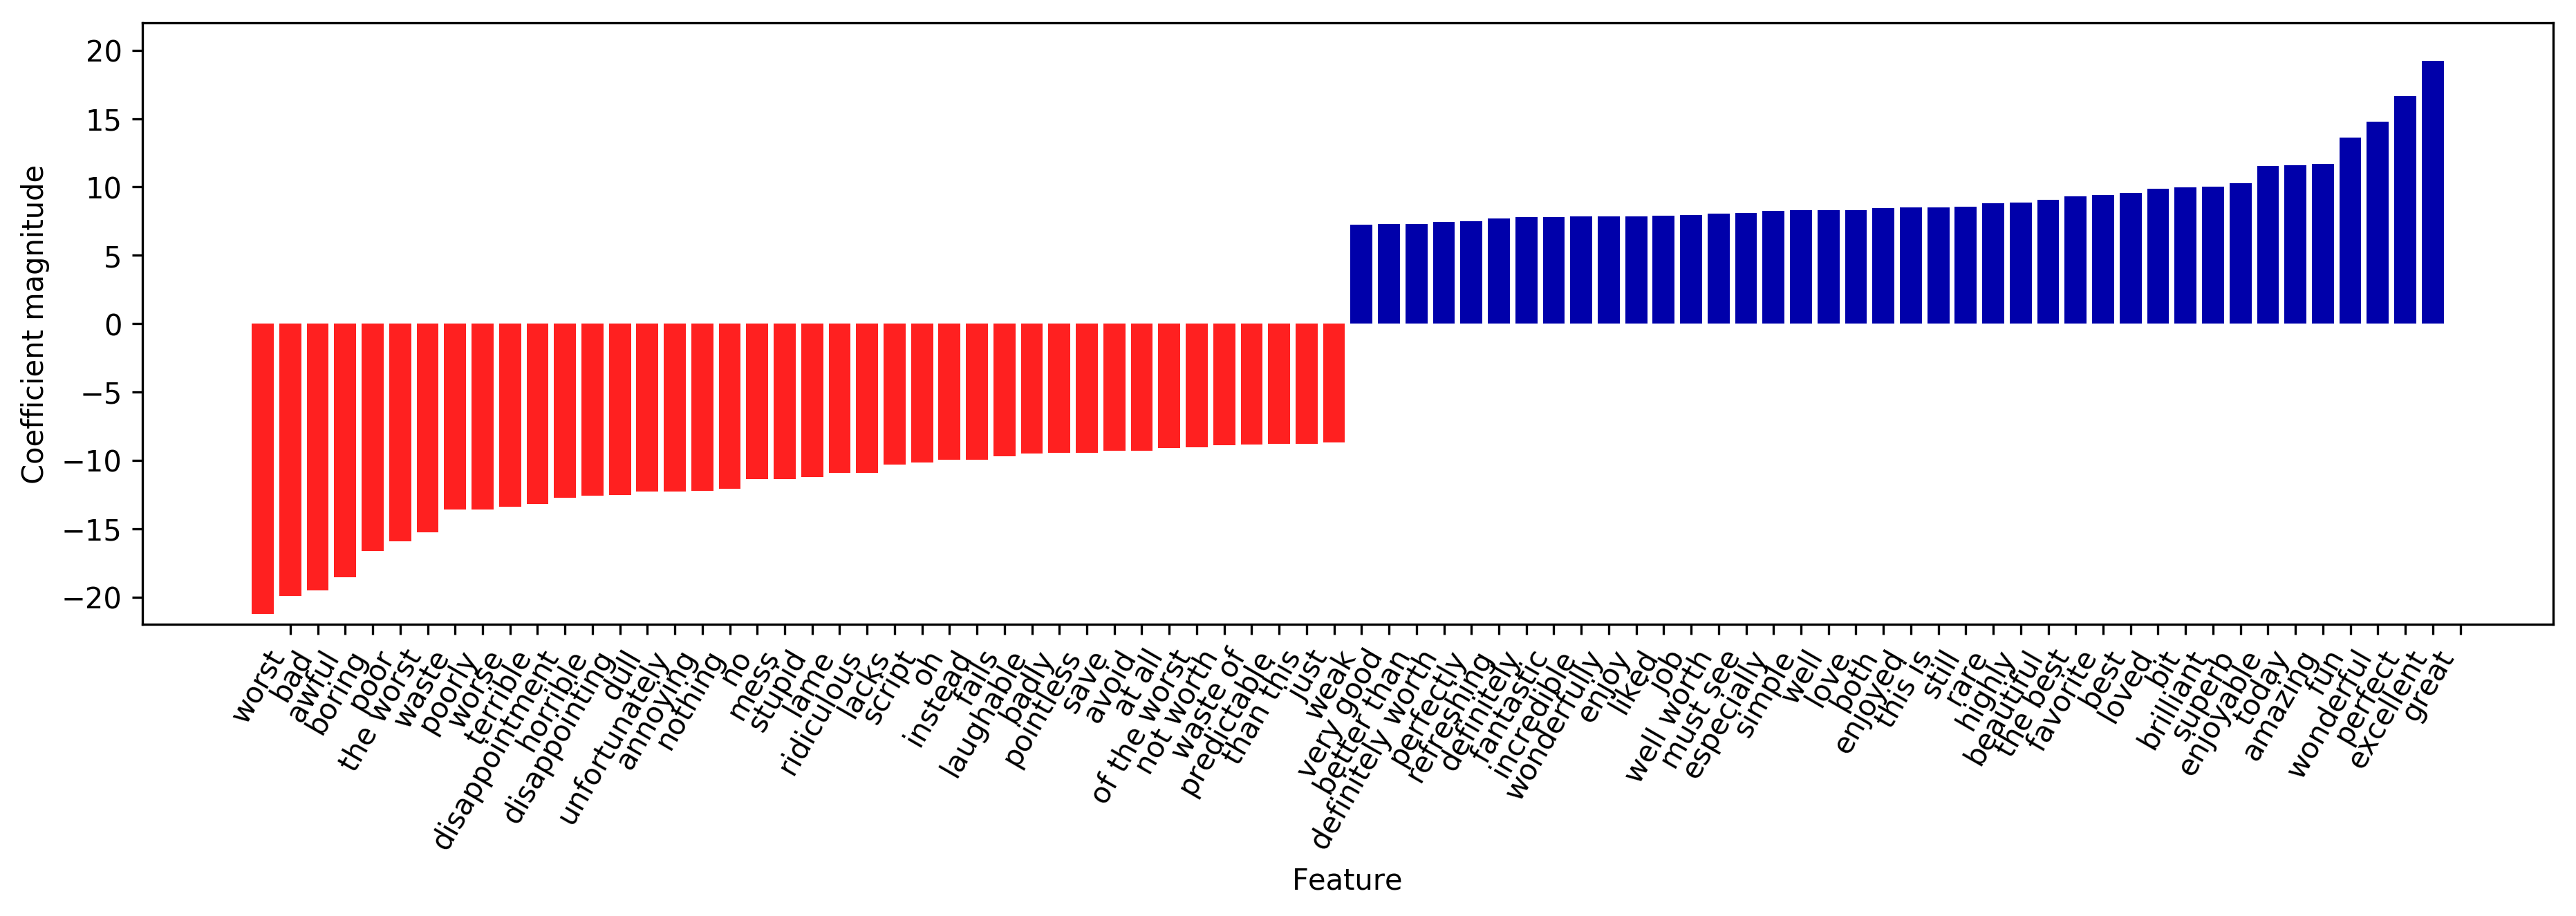

In [36]:
%%time
# extract feature names and coefficients
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)
plt.ylim(-22, 22)

Wall time: 482 ms


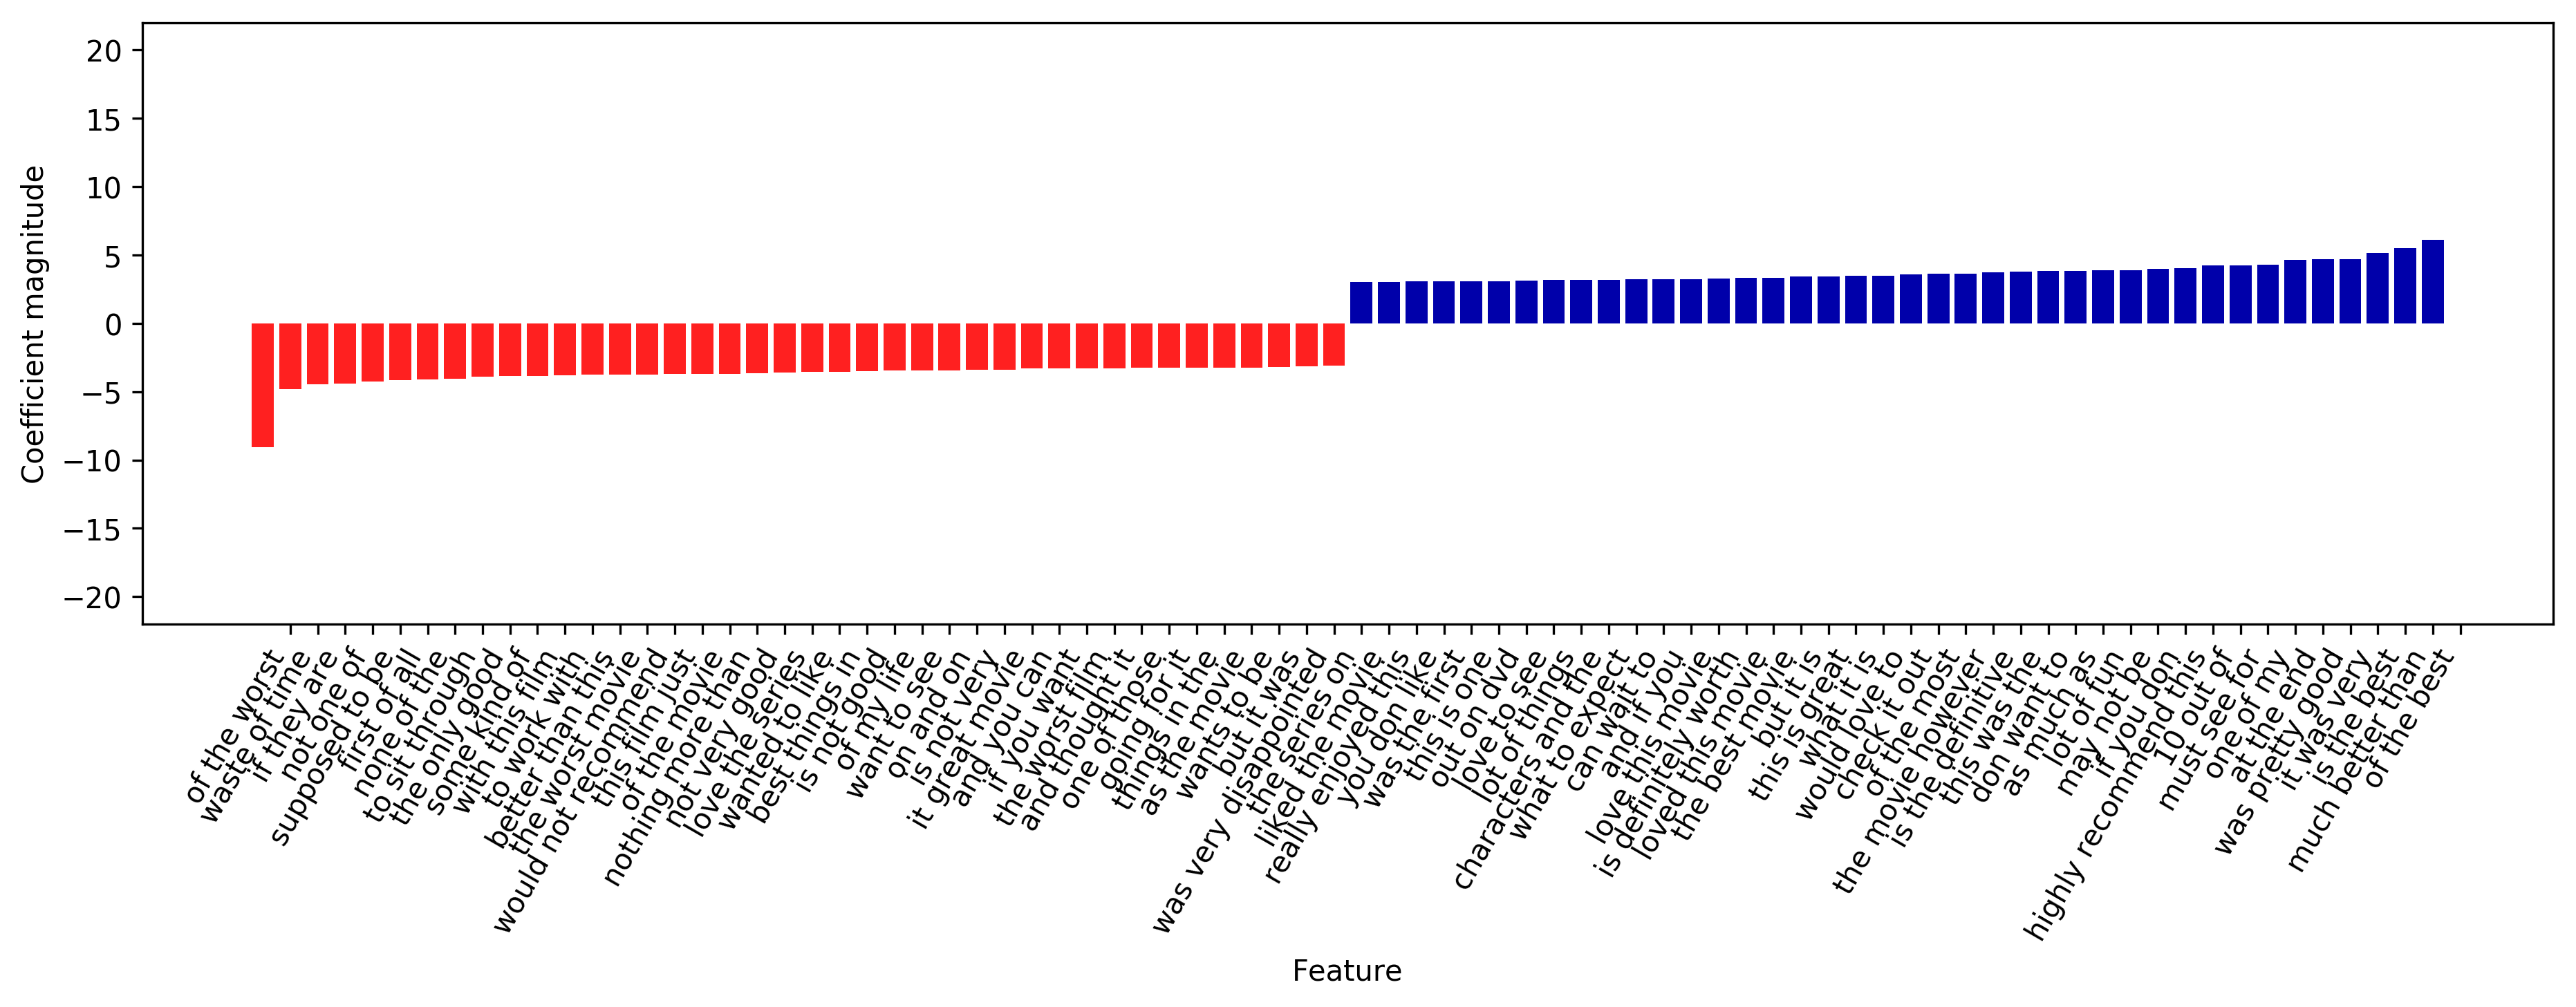

In [37]:
%%time
# find 3-gram features
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
# visualize only 3-gram features
mglearn.tools.visualize_coefficients(coef.ravel()[mask],
                                     feature_names[mask], n_top_features=40)
plt.ylim(-22, 22)

#### Advanced tokenization, stemming and lemmatization

#### This process takes approx: Last time it took Wall time: 12.5 s 

In [38]:
%%time
import spacy
import nltk

# load spacy's English-language models
en_nlp = spacy.load('en')
# instantiate nltk's Porter stemmer
stemmer = nltk.stem.PorterStemmer()

# define function to compare lemmatization in spacy with stemming in nltk
def compare_normalization(doc):
    # tokenize document in spacy
    doc_spacy = en_nlp(doc)
    # print lemmas found by spacy
    print("Lemmatization:")
    print([token.lemma_ for token in doc_spacy])
    # print tokens found by Porter stemmer
    print("Stemming:")
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

Wall time: 19 s


In [39]:
compare_normalization(u"Our meeting today was worse than yesterday, "
                       "I'm scared of meeting the clients tomorrow.")

Lemmatization:
[u'-PRON-', u'meeting', u'today', u'be', u'bad', u'than', u'yesterday', u',', u'-PRON-', u'be', u'scared', u'of', u'meet', u'the', u'client', u'tomorrow', u'.']
Stemming:
[u'our', u'meet', u'today', u'wa', u'wors', u'than', u'yesterday', u',', u'i', u'am', u'scare', u'of', u'meet', u'the', u'client', u'tomorrow', u'.']


In [40]:
%%time
# Technicallity: we want to use the regexp based tokenizer
# that is used by CountVectorizer  and only use the lemmatization
# from SpaCy. To this end, we replace en_nlp.tokenizer (the SpaCy tokenizer)
# with the regexp based tokenization
import re
from sklearn.feature_extraction.text import CountVectorizer
# regexp used in CountVectorizer:
regexp = re.compile('(?u)\\b\\w\\w+\\b')

# load spacy language model and save old tokenizer
en_nlp = spacy.load('en')
old_tokenizer = en_nlp.tokenizer
# replace the tokenizer with the preceding regexp
en_nlp.tokenizer = lambda string: old_tokenizer.tokens_from_list(
    regexp.findall(string))

# create a custom tokenizer using the SpaCy document processing pipeline
# (now using our own tokenizer)
def custom_tokenizer(document):
    doc_spacy = en_nlp(document, entity=False, parse=False)
    return [token.lemma_ for token in doc_spacy]

# define a count vectorizer with the custom tokenizer
lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)

Wall time: 685 ms


### This process takes approx: Last time it took Wall time: XX min XX s ==> Hurry up and just wait!!!

In [56]:
%%time
print ("Number of documents in text train data: {}\t".format(len(text_train)))
print("type of text_train: {}".format(type(text_train)))
print("length of text_train: {}".format(len(text_train)))

# transform text_train using CountVectorizer with lemmatization

#X_train_lemma = lemma_vect.fit_transform(text_train)
#print("X_train_lemma.shape: {}".format(X_train_lemma.shape))

# standard CountVectorizer for reference
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train.shape: {}".format(X_train.shape))


Number of documents in text train data: 25000	
type of text_train: <type 'list'>
length of text_train: 25000
X_train.shape: (25000, 27271)
Wall time: 11 s


### This process takes approx: Last time it took Wall time: XX min XX s ==> Hurry up and just wait!!!

In [58]:
%%time
# build a grid-search using only 1% of the data as training set:
from sklearn.model_selection import StratifiedShuffleSplit

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.99,
                            train_size=0.01, random_state=0)
grid = GridSearchCV(LogisticRegression(), param_grid, cv=cv)
# perform grid search with standard CountVectorizer
grid.fit(X_train, y_train)
print("Best cross-validation score "
      "(standard CountVectorizer): {:.3f}".format(grid.best_score_))
# perform grid search with Lemmatization
'''
grid.fit(X_train_lemma, y_train)
print("Best cross-validation score "
      "(lemmatization): {:.3f}".format(grid.best_score_))
'''

Best cross-validation score (standard CountVectorizer): 0.721
Wall time: 16.5 s


### Topic Modeling and Document Clustering
#### Latent Dirichlet Allocation

In [59]:
%%time
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

Wall time: 5.55 s


#### This process takes approx: Last time it took Wall time: 6 min  ==> Hurry up and just wait!!!

In [61]:
%%time
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_topics=10, learning_method="batch",
                                max_iter=25, random_state=0)
# be build the model and transform the data in one step
# computing transform takes some time,
# and we can save time by doing both at once.
document_topics = lda.fit_transform(X)

Wall time: 6min


In [62]:
print("lda.components_.shape: {}".format(lda.components_.shape))

lda.components_.shape: (10L, 10000L)


In [63]:
%%time
# for each topic (a row in the components_), sort the features (ascending).
# Invert rows with [:, ::-1] to make sorting descending
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# get the feature names from the vectorizer:
feature_names = np.array(vect.get_feature_names())

Wall time: 26 ms


In [64]:
%%time
# Print out the 10 topics:
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          didn          
young         world         worst         series        saw           
family        us            comedy        episode       am            
real          our           thing         tv            thought       
performance   american      guy           episodes      years         
beautiful     documentary   re            shows         book          
work          history       stupid        season        watched       
each          new           actually      new           now           
both          own           nothing       television    dvd           
director      point         want          years         got           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
horr

### This process takes approx: Last time it took Wall time: 11 min ==> Hurry up and just wait!!!

In [65]:
%%time
lda100 = LatentDirichletAllocation(n_topics=100, learning_method="batch",
                                   max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

Wall time: 11min 28s


In [66]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 41, 45, 51, 53, 54, 63, 89, 97])

In [67]:
%%time
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      
--------      --------      --------      --------      --------      
thriller      worst         german        car           beautiful     
suspense      awful         hitler        gets          young         
horror        boring        nazi          guy           old           
atmosphere    horrible      midnight      around        romantic      
mystery       stupid        joe           down          between       
house         thing         germany       kill          romance       
director      terrible      years         goes          wonderful     
quite         script        history       killed        heart         
bit           nothing       new           going         feel          
de            worse         modesty       house         year          
performances  waste         cowboy        away          each          
dark          pretty        jewish        head          french        
twist 

In [68]:
%%time
# sort by weight of "music" topic 45
music = np.argsort(document_topics100[:, 45])[::-1]
# print the five documents where the topic is most important
for i in music[:10]:
    # show first two sentences
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

I love this movie and never get tired of watching. The music in it is great.

I enjoyed Still Crazy more than any film I have seen in years. A successful band from the 70's decide to give it another try.

Hollywood Hotel was the last movie musical that Busby Berkeley directed for Warner Bros. His directing style had changed or evolved to the point that this film does not contain his signature overhead shots or huge production numbers with thousands of extras.

What happens to washed up rock-n-roll stars in the late 1990's? They launch a comeback / reunion tour. At least, that's what the members of Strange Fruit, a (fictional) 70's stadium rock group do.

As a big-time Prince fan of the last three to four years, I really can't believe I've only just got round to watching "Purple Rain". The brand new 2-disc anniversary Special Edition led me to buy it.

This film is worth seeing alone for Jared Harris' outstanding portrayal of John Lennon. It doesn't matter that Harris doesn't exactly re

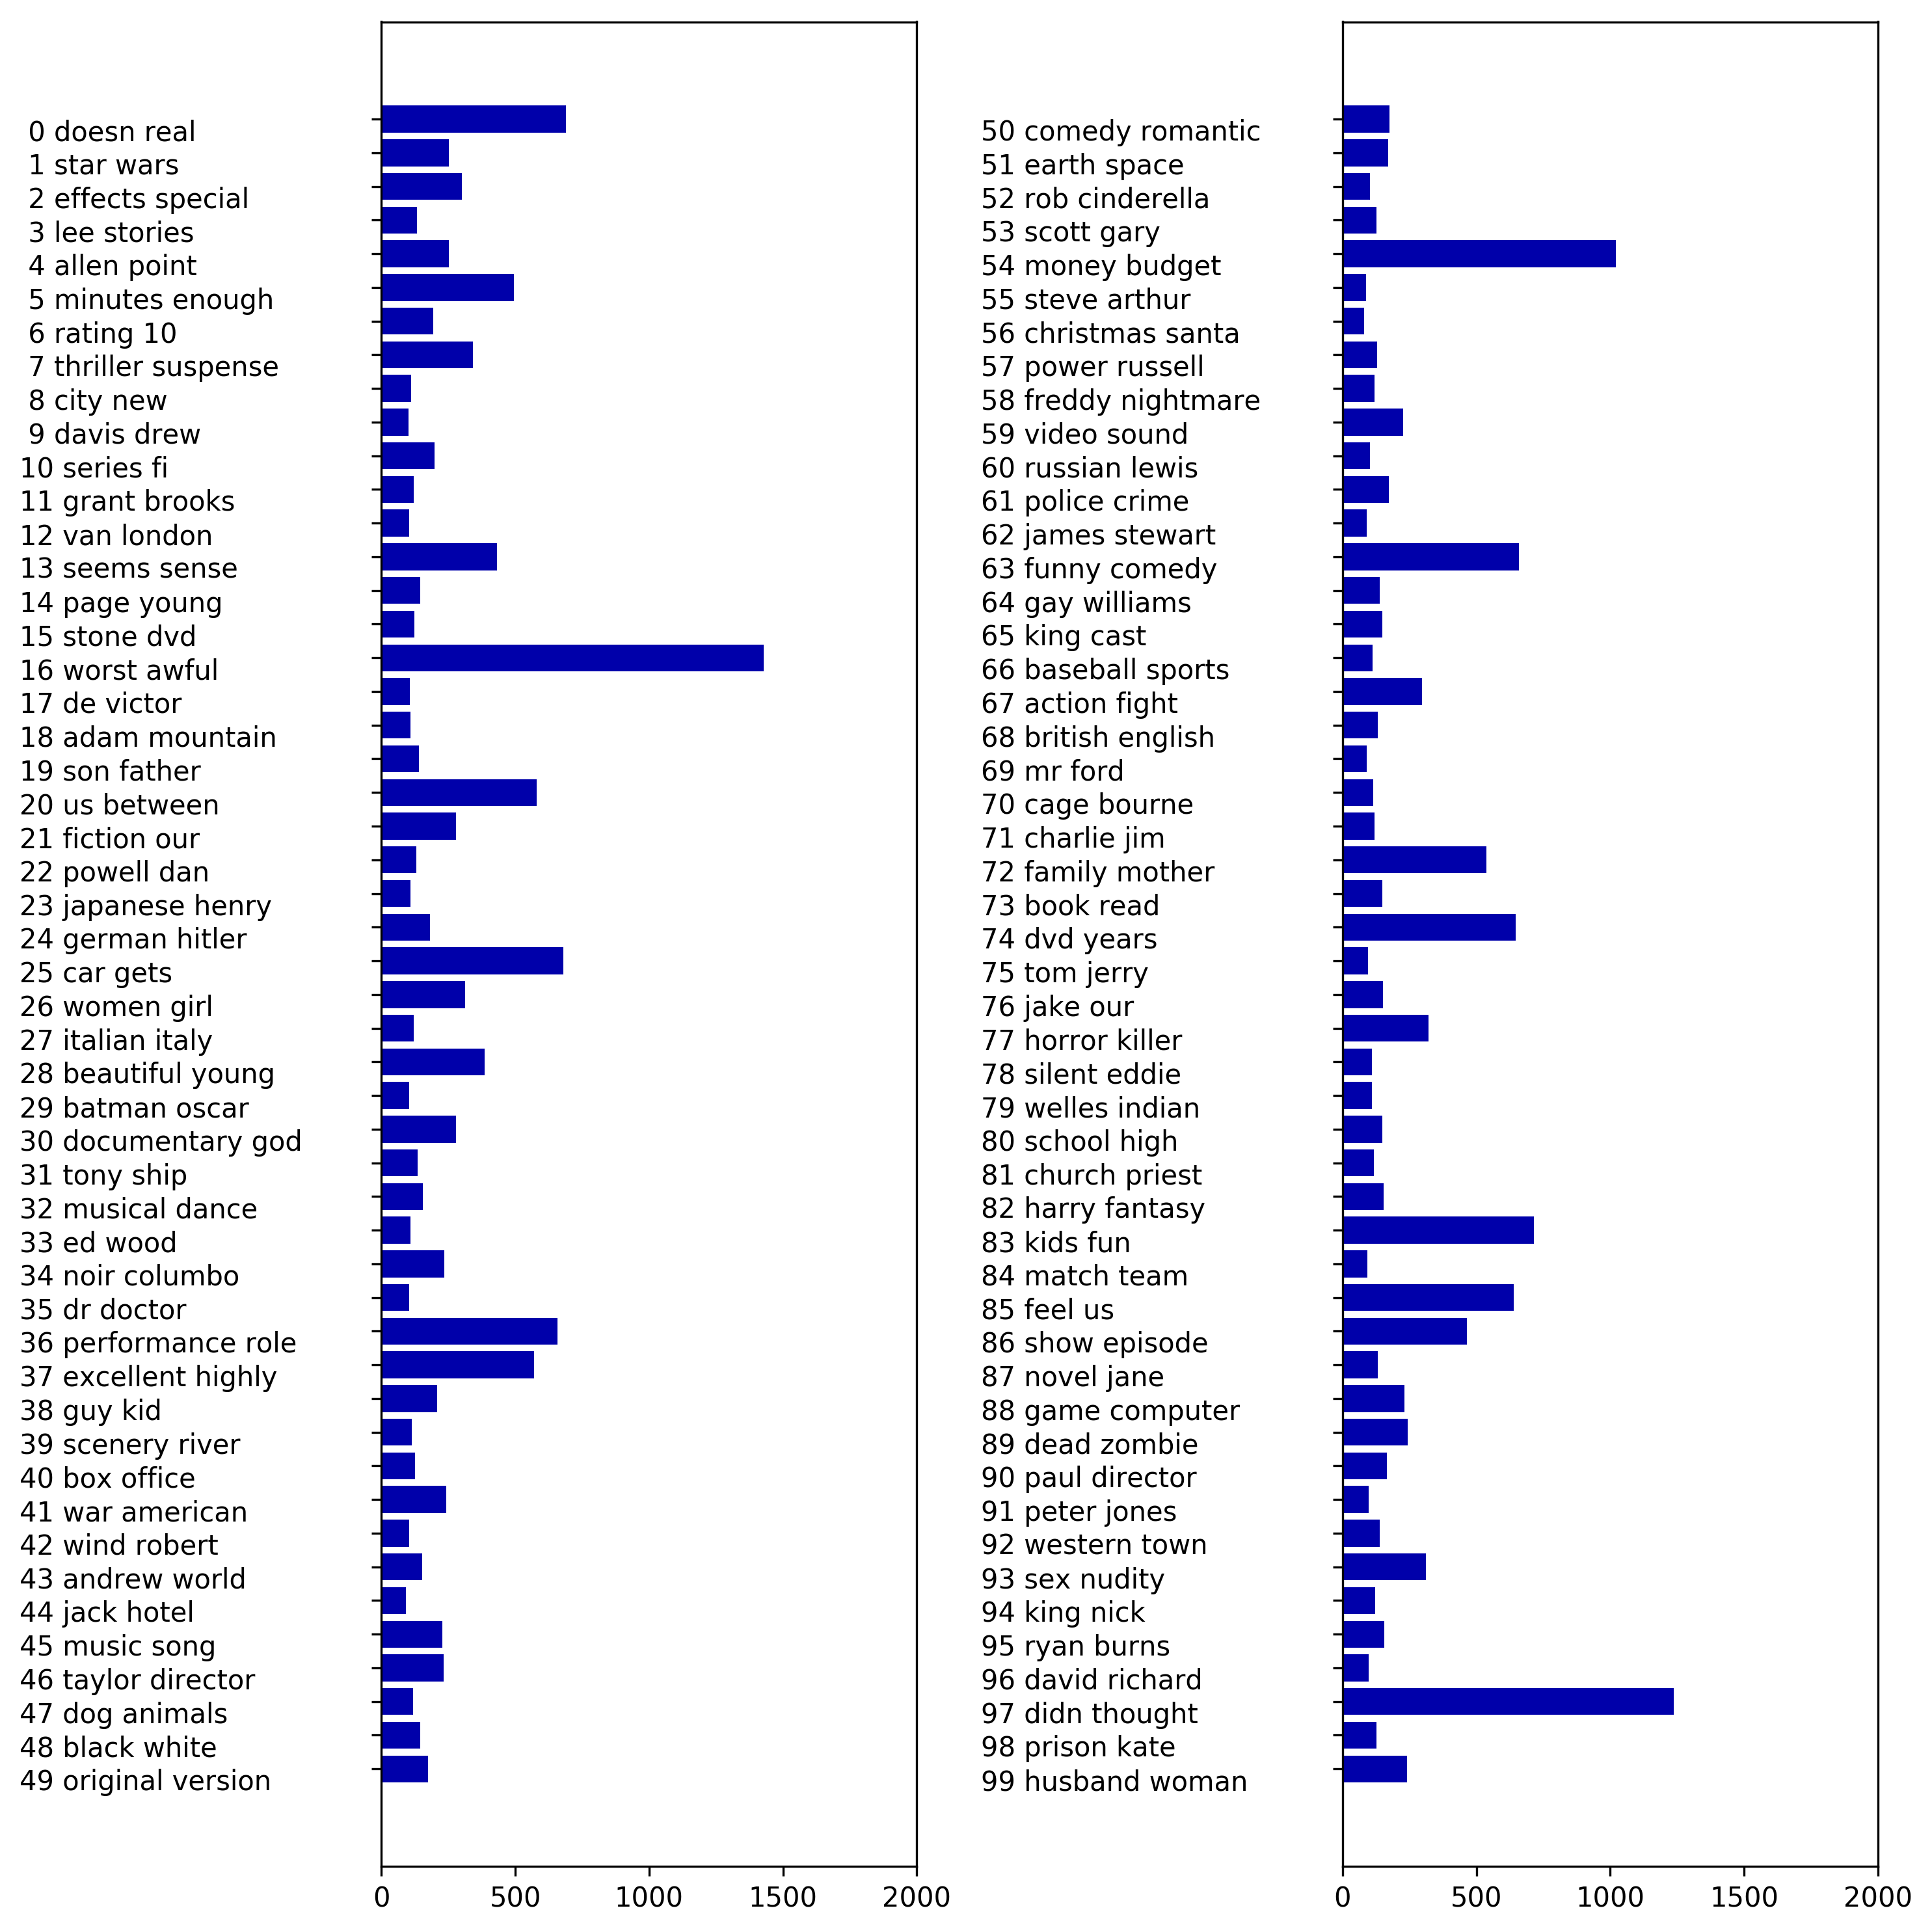

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]
# two column bar chart:
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()

### Summary and Outlook